# **Music Recommendation System Proposal**

## **EXECUTIVE SUMMARY**

Users of music streaming platforms often rely on their own knowledge and preferences to discover music they like. However, to enhance user engagement, platforms must address the challenge of helping users discover new content effortlessly. The goal is to keep users immersed in the platform's content without requiring extensive manual searching or exploration.

A well-designed recommendation system plays a crucial role in addressing these challenges. By understanding each user's musical preferences, such systems can curate personalized recommendations that introduce users to new content aligned with their tastes. This seamless flow of recommended music not only prolongs user activity on the platform but also fosters a sense of personalized experience.

The convenience and enjoyment offered by a robust recommendation system often results in repeated platform usage. Users integrate music streaming into their daily activities, whether during commutes, work hours, workouts, or travels. As a result, engagement with the music platform becomes an integral part of users' routines, enhancing their overall experience and satisfaction.


The objective is to build a recommendation system to propose 10 songs for a users baed on the likelihood of the user enjoying those songs.


In order to build such a recommendation system some key questions will need to be addressed.

- What data points are available on users and songs that can be used to build a recommendation system?
- How large is the data and how will can the data be filtered?
- How sparse is the dataset?
- How should user preferences be defined - what constitutes a user liking a song?
- What algorithms will be used in training?
- What performance metrics will be useful in evaluating the performance of the models?

### **Methodology & Key Findings:**

Combining the data from the count_df (users and their play counts) and song_df (song features) led to an original dataset of 2 million rows. This large of a dataset can create long processing times and can make it more difficult and less efficient when training models. This led to a need to trim down the dataset to a more manageable size. The following is a list of steps taken and the resulting size of the dataset at each step.

1. Filter the dataset to contain users that have listened to at least 90 songs. Resulted in a decrease from 2 million rows to 438,390 rows.
2. Filter the dataset to only include songs that have 120 or more listeners reduced the dataset further to 130,398 rows.
3. Removing instances where a user listened to a song more than 5 times reduces our dataset to 117,876 observations. This was needed to create a semblance of a rating system.
4. Remove rows where the year = 0. Since we are missing the true value for the release year for these songs, it was decided that the best path forward was to drop these records. This brought the final data set to 97,227 rows - about 5% of the size of the original dataset.

The final dataset that will be used consists of about 3150 users and 470 songs where the majority of user-song interactions have a play count of 1 (~60%). Play count is defined as the number of times a song was listened to completely and does not count a song that was skipped. This play count is important to our threshold for relevancy when training the model.

The techniques implemented in this project include the following:
  - Rank Based or Popularity Based
  - User-User Similarity Collaborative Filtering
  - Item-Item Similarity Collaborative Filtering
  - Matrix Factorization
  - Cluster Based
  - Content Based

In an effort to build the most performant music recommendation system, I experimented with different ways to improve the performance of the models. These include:

- The filtering cutoffs for the final dataset.
  - After testing combinations of users that have listenedd to 90, 100 and 50 songs and songs that had 120, 100, 50 users with interactions, it was decided to keep the dataset filtering at users that listened to 90 or more songs and songs with 120 or more interactions. Other variations did not provided enough benefit to constitute making a change in the cutoffs.
- The ratio of training and test data.
  - Performance was evaluated using a 60/40, 70/30 and 80/20 split. The 80/20 split was decided on.
- The threshold in precision and recall at k.
  - 1, 1.1, 1.2, 1.5 were all evaluated. 1 and 1.5 are shown in the analysis for comparison.

The threshold parameter in precision and recall at k had the greatest impact on performance.

Hyperparater tuning was also performed on each model to find the best performance.

Below is a table of performance metrics across each of the models.


Threshold = 1

| Model | k | threshold| RMSE | Precision | Recall |F1 Score |
|-----------------|-----------------|-----------------|-----------------|-----------------|-----------------|-----------------|
|user-user | 40 | 1 | 1.087 | 1.0 | 1.0 | 1.0|
|user-user optimized| 40|1 | 1.0367| 1.0| 1.0 | 1.0 |
|item-item| 40|1 | 1.0235| 1.0| 1.0 | 1.0 |
|item-item optimized| 40|1 | 1.0147| 1.0| 1.0 | 1.0 |
|SVD| 30|1 | 1.0095| 0.999| 0.974 | 0.986 |
|SVD optimized| 40|1 | 0.9986| 0.998| 0.992 | 0.995 |
|Cluster| 40|1 | 1.0363| 0.929| 0.908 | 0.942 |
|Cluster optimized| 40|1 | 1.0490| 0.98| 0.909 | 0.943 |


Threshold = 1.5 (a more strict threshold)

| Model | k | threshold| RMSE | Precision | Recall |F1 Score |
|-----------------|-----------------|-----------------|-----------------|-----------------|-----------------|-----------------|
|user-user | 40 | 1.5 | 1.087 | 0.366 | 0.567 | 0.445|
|user-user optimized| 40|1.5 | 1.0367| 0.401| 0.613| 0.485|
|item-item| 40|1.5 | 1.0235| 0.289| 0.50 | 0.366|
|item-item optimized| 40|1.5 | 1.0147| 0.391| 0.607 | 0.476|
|SVD| 30|1.5 | 1.0095| 0.38| 0.552| 0.450 |
|SVD optimized| 40|1 .5| 0.9986| 0.364| 0.552 | 0.439|
|Cluster| 40|1.5 | 1.0363| 0.347| 0.503 | 0.411 |
|Cluster optimized| 40|1.5 | 1.0490| 0.347| 0.442| 0.407 |

It's easy to see that our models with a less strict threshold of 1 all generally perform well. In fact the user-user and item-item baselines and tuned models have perfect accuracy.

Lets' also look at a given user and an item the user has interacted with a compare predicted value of each model. The following table looks at user 6958 and song 1671. The actual value is 2. (This uses  threshold = 1.)

|model | predicted value |
|-----------------|-----------------|
|user-user | 1.73|
|user-user optimized| 1.91 |
|item-item| 1.31|
|item-item optimized| 1.98|
|SVD| 1.31|
|SVD optimized| 1.26|
|Cluster| 1.2|
|Cluster optimized| 1.41|

The user-user optimized and item-item optimized perform the best when threshold =1 and threshold = 1.5. When threshold = 1, the item-item optimized model is slightly better with a lower RMSE. When threshold = 1.5, the user-user optimized model has a slightly higher F1 Score.



## **PROBLEM AND SOLUTION SUMMARY**

End users of music streaming platforms seek personalized song recommendations tailored to their unique tastes and preferences. They desire a seamless experience where the platform effortlessly streams music they enjoy, minimizing the need for manual intervention.

For music streaming platforms, the primary objectives are user retention, increased engagement, and the delivery of a satisfying user experience through relevant music suggestions.

The key challenge addressed by a recommendation system is to generate song recommendations that resonate with users, thereby fostering continuous engagement and satisfaction with the platform.

We're tackling the challenge of leveraging data science to construct a recommendation system. The goal is to suggest the top 10 songs to a user, focusing on the probability that the user will enjoy listening to these songs.

Based on our key findings, the proposed solution is to utilize a less strict threshold of 1 and instrument the item-item optimized model. For users that are new to the music streaming platform, there is an option to utilized the Popularity or Rank based model. This will recommend the overall most popular songs. You could further restrict this by release year to ensure only newer popular songs are recommended. Once users begin interacting with songs, the item-item similarity model can recommend more personalized content.


By implementing the recommended solution, users will experience enhanced music discovery, increasing their chances of engaging with a wider range of content for extended durations. This approach also encourages users to revisit the music streaming platform regularly, fostering a continuous cycle of discovery and enjoyment. Ultimately, this leads to increased user satisfaction and loyalty, which can translate into higher revenue for the business.

## **RECOMMENDATION FOR IMPLEMENTATION**

 While the solution proposed is ready for implementation, the evaluation of models could be more robust and complete with more data. For example, there were many songs that did not have a release year and the genre of the song was missing from our dataset. These two data points are important features of the items and could make an impact on how different models we evaluated perform. Since the release year and genre of a song is publically available and an expected value in a music streaming platform, it's likely this data can be collected and added to the dataset. This would be my first recommendation. Having a more complete dataset is an important first step to ensuring a successful path forward. I would recommend re-running this analysis and model selection once the dataset includes these missing pieces. Most users tend to stay within similar genres during a session. This is often based on mood or activity. For example, a user may prefer a different genre style when working out than when cooking. With the addition of genre to the dataset, it's possible to create different recommendation sets based on mood/activity/genre. This will ensure that recommendations are more targeted to what the user wants to listen to at that time.

Integrating the trained model into the music streaming platform's backend infrastructure should be handled by the Engineering team. A common approach is to develop an API to make requests for recommended songs based on the user data. Real-time recommendations are needed and this will need to be considered in the engineering solution. The solution should also be scalable to handle different loads of user traffic. A data pipeline between the data source and the recommendation system may need to be set-up in order to handle the the flow of data and recommendations.

There are costs to the different needs of implementing the recommendation system, including development time, infrastructure, server hosting fees, API usage fees (if API is used), tools to monitor etc. These costs should be assessed and communicated by the Engineering team as they propose implementation solutions.

Risks of performance bottlenecks and functionality issues should also be  tested for quality assurance and monitored to ensure user experience is not interupted.

The user interface needs to also be considered. There is a need and a cost to designing how recommendations will be presented to users. This experience need to be easy to use and compelling to users. Otherwise, there is a risk of the recommendations not being interacted with. If users do not see the recommendations or are not compelled by the recommendations this runs the risk of losing out on the benefits of the recommendation system - higher engagement, higher revenue. There is also be an opportunity to create a user feedback loop. Giving the user a way to provide if they like the recommended song or not (perhaps through a thumbs up/thumbs down) can be used in future models.

Once the model is fully released and users are being presented recommendations, it's important to have dashboard to monitor user activity and key performance metrics that are established. This will help with iterations for improvements and provide a general understanding of user adoption and engagement.


Finally, as users begin interacting more with the platform content (this is a benefit of recommending content), these models should be periodically re-assessed. With more data it's possible that a different threshold or a rating system or another model will perform better. I would suggest implementing this proposed solution as a v1 recommendation system and completing another round of model analysis within 3-6 months.

## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

song_data

song_id - A unique id given to every song

title - Title of the song

Release - Name of the released album

Artist_name - Name of the artist

year - Year of release

count_data

user _id - A unique id given to the user

song_id - A unique id given to the song

play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

In [1]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Import Matplotlib the Basic library for data visualization
import matplotlib.pyplot as plt

# Import seaborn - Slightly advanced library for data visualization
import seaborn as sns

# Import the required library to compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# Import defaultdict from collections A dictionary output that does not raise a key error
from collections import defaultdict

# Impoort mean_squared_error : a performance metrics in sklearn
from sklearn.metrics import mean_squared_error

### **Load the dataset**

In [3]:
# Importing the datasets

count_df = pd.read_csv("/content/drive/MyDrive/Applied Data Science MIT/Capstone Project/count_data.csv")
song_df = pd.read_csv("/content/drive/MyDrive/Applied Data Science MIT/Capstone Project/song_data.csv")

### **Understanding the data by viewing a few observations**

In [4]:
# See top 10 records of count_df data
print(count_df.head(10))


   Unnamed: 0                                   user_id             song_id  \
0           0  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOAKIMP12A8C130995   
1           1  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBBMDR12A8C13253B   
2           2  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBXHDL12A81C204C0   
3           3  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBYHAJ12A6701BF1D   
4           4  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SODACBL12A8C13C273   
5           5  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SODDNQT12A6D4F5F7E   
6           6  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SODXRTY12AB0180F3B   
7           7  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOFGUAY12AB017B0A8   
8           8  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOFRQTD12A81C233C0   
9           9  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOHQWYZ12A6D4FA701   

   play_count  
0           1  
1           2  
2           1  
3           1  
4           1  
5           5  
6           1  
7 

In [5]:
# See top 10 records of song_df data
print(song_df.head(10))


              song_id                                              title  \
0  SOQMMHC12AB0180CB8                                       Silent Night   
1  SOVFVAK12A8C1350D9                                        Tanssi vaan   
2  SOGTUKN12AB017F4F1                                  No One Could Ever   
3  SOBNYVR12A8C13558C                                      Si Vos Querés   
4  SOHSBXH12A8C13B0DF                                   Tangle Of Aspens   
5  SOZVAPQ12A8C13B63C  Symphony No. 1 G minor "Sinfonie Serieuse"/All...   
6  SOQVRHI12A6D4FB2D7                                   We Have Got Love   
7  SOEYRFT12AB018936C                                  2 Da Beat Ch'yall   
8  SOPMIYT12A6D4F851E                                            Goodbye   
9  SOJCFMH12A8C13B0C2                         Mama_ mama can't you see ?   

                                release  \
0                 Monster Ballads X-Mas   
1                           Karkuteillä   
2                                B

### **Let us check the data types and and missing values of each column**

In [6]:
# See the info of the count_df data
count_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [7]:
#checking for missing values
count_df.isnull().sum()

Unnamed: 0    0
user_id       0
song_id       0
play_count    0
dtype: int64

In [8]:
# Number of unique song IDs in count_df
count_df['song_id'].nunique()

10000

In [9]:
# General statistics on count_df
count_df.describe()

,Unnamed: 0,play_count
count,2.000000e+06,2.000000e+06
mean,9.999995e+05,3.045485e+00
std,5.773504e+05,6.579720e+00
min,0.000000e+00,1.000000e+00
25%,4.999998e+05,1.000000e+00
50%,9.999995e+05,1.000000e+00
75%,1.499999e+06,3.000000e+00
max,1.999999e+06,2.213000e+03


In [10]:
# See the info of the song_df data
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999983 non-null   object
 2   release      999993 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


In [11]:
# Number of unique song IDs in song_df
song_df['song_id'].nunique()

999056

In [12]:
# Number of unique title in song_df
song_df['title'].nunique()

702427

**Observations:**

The count_df has 4 columns and 2 million rows.
- Unnamed:0 column is an integer that appears to be a row number or index. This column is not useful. We can drop this column.
- user_id and song_id are objects and play_count is an integer.
- There are no missing values in this dataset.
- There are 10,000 unique songs in the dataset.
- The average number of times a song was played is 3.
- The minimum number of times a song was played is 1.
- The maximum number of times a song was played is 2213. This is most likely an outlier as this is an extreme number of times to listen to a song.

The song_df has 5 columns and 1 million rows.
- song_id, title, release and artist_name are all object data types while year is an integer.
- We can see in the first 10 rows of the dataset that year sometimes has a 0 value. This is obviously not a real year value but an imputed value when year was missing. We will want to look at the unique values of this column to better understand valid versus missing or invalid values.
- The title column has 15 missing values and the release column has 5 missing values.
- There are 999,056 unique song_ids. Given the total row count this means that there are a few rows that share the same song_id. This suggests there are duplicates.
- There are 702,428 unique titles in the dateset. This means there are many instances of unique songs_ids with the same title.





# Data Preparation

There are steps we will take to prepare a dataset that can be used as a training and test data for building a recommendation system.

First, we will want to create a single dataframe that consists of relevant data from both the count_df and song_df. We'll join these datasets on the song_id column that both datasets share and drop the duplicate song_ids we found during data exploration during this process.

In [13]:
# Left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously
df = pd.merge(count_df, song_df.drop_duplicates(['song_id']), on="song_id", how="left")

# Drop the column 'Unnamed: 0'
df= df.drop(['Unnamed: 0'], axis =1)

## Name the obtained dataframe as "df"
df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


Since the song_id and user_id columns are encrypted, we will encode these fields to be numeric values using a label encoder, this will make the data easier to work with and more performant.

In [14]:
# Apply label encoding for "user_id" and "song_id"
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['user_id'] = le.fit_transform(df['user_id'])
df['song_id'] = le.fit_transform(df['song_id'])
df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
3,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005
4,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


A dataset of size 2000000 rows x 7 columns can be quite large and may require a lot of computing resources to process. This can lead to long processing times and can make it difficult to train and evaluate your model efficiently.
In order to address this issue, we will trim down your dataset to a more manageable size.

We will first filter the dataset to contain users that have listened to at least 90 songs.

Next we will filter these results further to include songs that have been listened to by at least 120 users.

In [15]:
# Get the column containing the users
users = df.user_id

# Create a dictionary from users to their number of songs
ratings_count = dict()

for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1

In [16]:
# We want our users to have listened at least 90 songs
RATINGS_CUTOFF = 90

# Create a list of users who need to be removed
remove_users = []

for user, num_ratings in ratings_count.items():

    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [17]:
# confirmed that the above removed users with less than 90 interactions
df['user_id'].value_counts()

user_id
32542    711
75144    643
23297    556
10807    540
7834     533
        ... 
10536     90
63140     90
20927     90
67951     90
31296     90
Name: count, Length: 3156, dtype: int64

In [18]:
#check the size of the dataset
df.shape

(438390, 7)

Filtering the dataset to include only users that have listened to at least 90 songs resulted in the size of the dataset reducing from 2 million rows to 438,390 rows.

In [19]:
# Get the column containing the songs
songs = df.song_id

# Create a dictionary from songs to their number of users
ratings_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in ratings_count:
        ratings_count[song] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[song] = 1

In [20]:
# We want our song to be listened by atleast 120 users to be considred
RATINGS_CUTOFF = 120

remove_songs = []

for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)

df_final= df.loc[ ~ df.song_id.isin(remove_songs)]

In [21]:
#checking the size of the dataset
df_final.shape

(130398, 7)

Further filtering the dataset to include songs that have 120 or more listeners reduced the dataset to 130,398 rows.

Next we will solve for our need to have a rating scale. In order to create something similar to a rating scale, we will remove instances where users have listened to a song more than 5 times. We can then use play_count as a rating, with values between 1 and 5.

In [22]:
# Drop records with play_count more than(>) 5
df_final = df_final[df_final.play_count<=5]

In [24]:
# Check the size of the data
df_final.shape

(117876, 7)

Removing instances where a user listened to a song more than 5 times reduces our dataset to 117,876 observations.

And lastly, we will remove rows where the year = 0. These are instances of missing values.

In [25]:
#drop rows where `year = 0`.
df_final = df_final[df_final['year'] > 0]


In [26]:
#Get the count of rows and columns.
df_final.shape

(97227, 7)

The final dataset now contains 97,227 rows - about 5% of the size of the original dataset.

In [27]:
#view the first 5 rows of the final dataset.
df_final.head()

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id is 3153.

In [28]:
# Display total number of unique user_id
num_users = print(df_final['user_id'].nunique())

3154


Total number of unique song id 478.

In [29]:
# Display total number of unique song_id
print(df_final['song_id'].nunique())


478


Total number of unique titles is 476.

In [30]:

# Display the total number of unique titles
df_final['title'].nunique()

476

Total number of unique artists is 185.

In [31]:
# Display total number of unique artists
df_final['artist_name'].nunique()


185

In [32]:
# Checking for missing values
df_final.isna().sum()

user_id        0
song_id        0
play_count     0
title          0
release        0
artist_name    0
year           0
dtype: int64

**Observations:**
- There are **3,154 unique users **  and ** 478 unique songs** from 185 artists in the dataset.
- As per the number of unique users and songs, there is a **possibility of 3154 * 478 = 1,507,612 user-song pairs** in the dataset. But **we only have 97,227 rows**, Not every user has listened to every song in the dataset. We can build a recommendation system to recommend songs to users in which they have not interacted with.
- There are 478 unique song_ids and 476 unique titles. This suggests that two song_ids share the same title.




### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [33]:
#finding the song that was played by the most users
popular = df_final['song_id'].value_counts()
popular.head(10)

song_id
8582    751
1118    662
4152    652
5531    618
4448    609
6189    606
6293    583
703     567
8092    550
9931    544
Name: count, dtype: int64

In [34]:
#return title of the most played song
most_played = df_final['title'][df_final['song_id'] == 8582].unique()
print(most_played)

['Use Somebody']


In [35]:
#find the song with the most total plays
most_played = df_final.groupby('song_id')['play_count'].sum().sort_values(ascending=False)
most_played.head(10)

song_id
8582    1463
5531    1427
4448    1291
4152    1259
1118    1203
8092    1126
6189    1067
7416    1062
703     1042
6293    1025
Name: play_count, dtype: int64

In [36]:
# return the title of the song with the highest total plays
most_plays= df_final['title'][df_final['song_id'] == 8582].unique()
print(most_plays)

['Use Somebody']


Most interacted users

In [37]:
#find the user_id with the most interactions
active_users = df_final['user_id'].value_counts()
active_users.head(10)

user_id
61472    207
15733    183
37049    174
9570     150
10763    150
43041    148
9097     148
75144    146
23337    142
26616    142
Name: count, dtype: int64

#### **Observations and Insights:**

- The song with the most interactions is Use Somebody. This song has been listened to by 751 unique users in our filtered dataset. It also has the most total plays (1,463 total play counts).
- User 61472 has the most interactions with songs in our database. This user has listened to 207 songs in our filtered dataset.






Songs by release year

In [38]:
# number of songs played by release year - we will use song_id instead of title since some song_ids share the same title in our dataset

count_songs = df_final.groupby('year').count()['song_id']

songs_per_year = pd.DataFrame(count_songs)

songs_per_year

,song_id
year,
1969,238
1970,109
1971,133
1973,270
1974,583
1975,173
1976,478
1978,119
1979,220


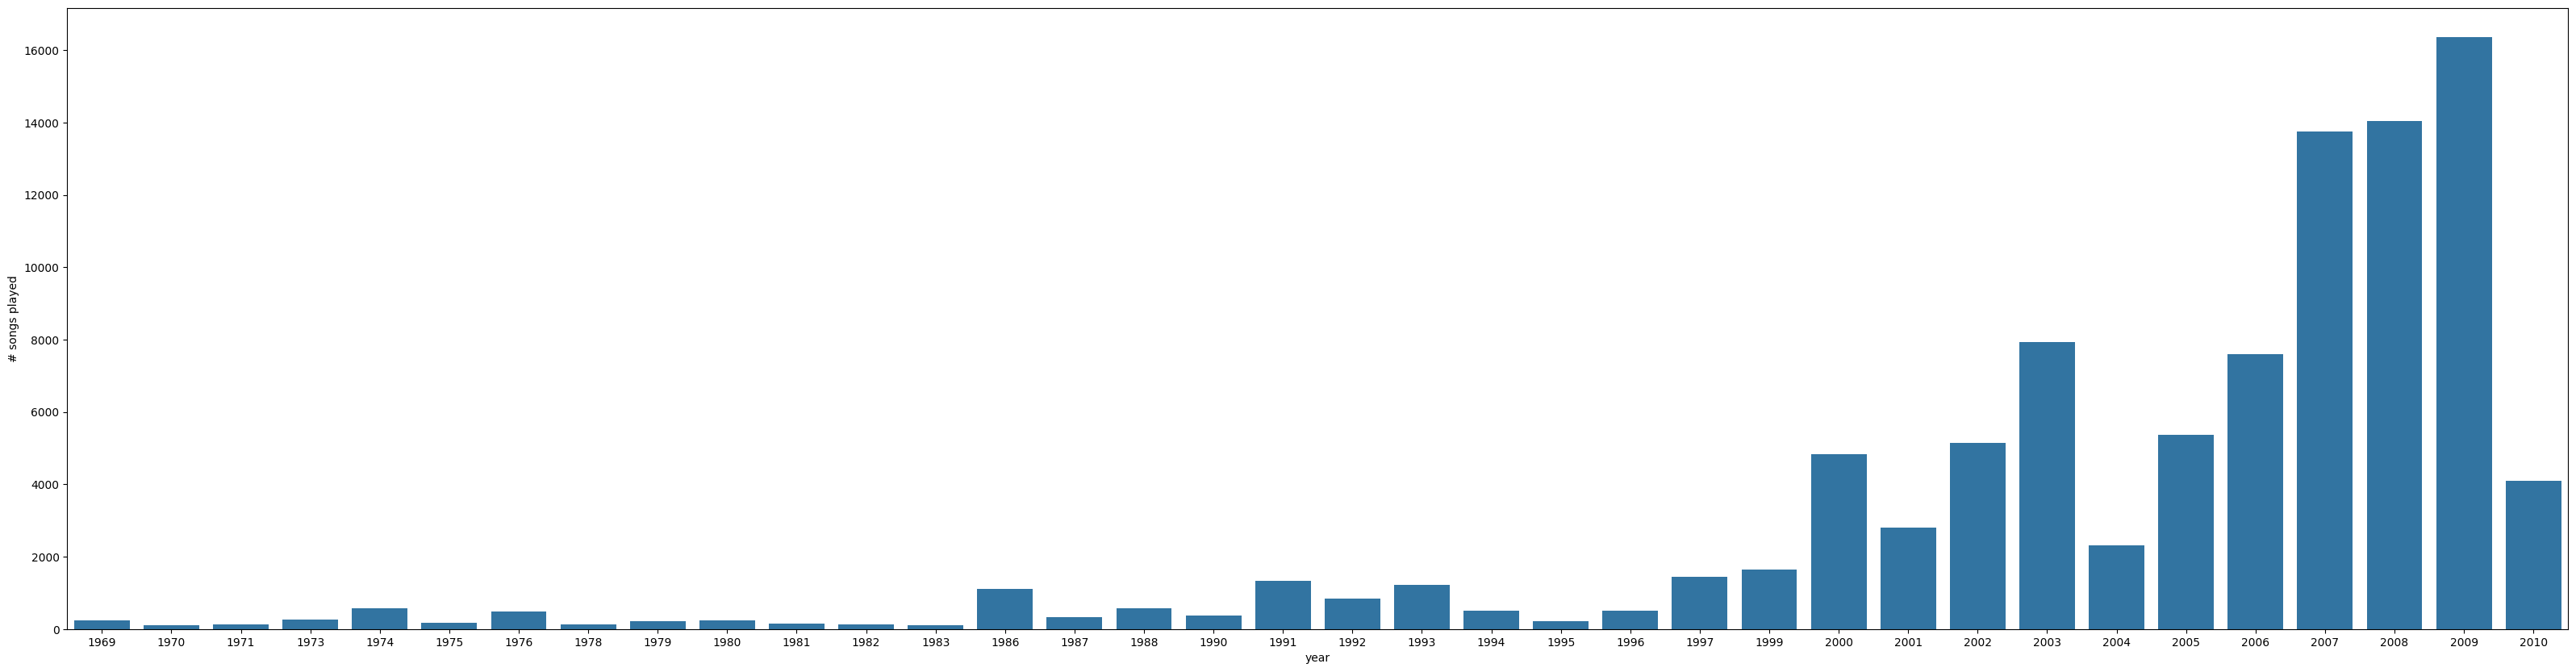

In [39]:
# Create a barplot plot with y label as "number of titles played" and x -axis year


# Set the figure size
plt.figure(figsize = (40, 10))

sns.barplot(x = songs_per_year.index,
            y = 'song_id',
            data = songs_per_year,
            estimator = np.median)

# Set the y label of the plot
plt.ylabel('# songs played')

# Show the plot
plt.show()


#### **Observations and Insights:** #

Our dataset consists mostly of songs froom 2000-2010, with 2007, 2008 and 2009 being the most frequent.  There are very few songs are from the 70s and 80s. This means we will be recommending songs mostly from the early 2000s.

During the period 1969 - 1986, the number of songs is extremely low. Perhaps a large portion of the songs where year = 0 were from this time, explaining the missing or imputed values.

Distribution of play counts:

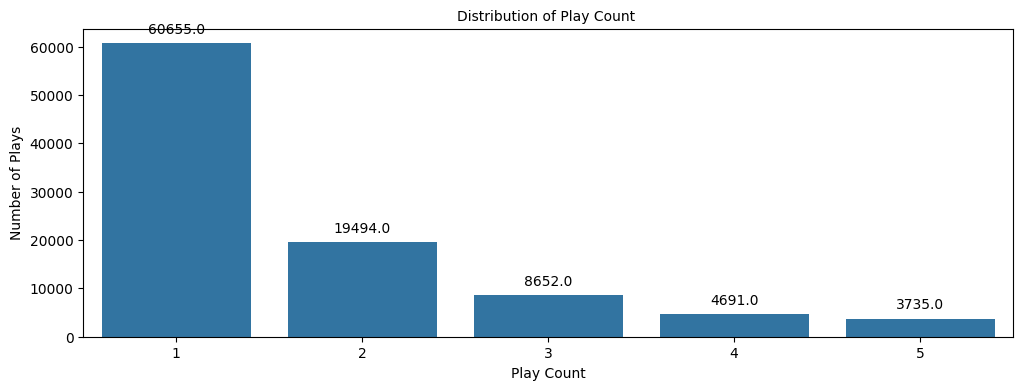

In [40]:
# Distribution of play counts
plt.figure(figsize = (12, 4))
ax = sns.countplot(x="play_count", data=df_final)


# Add text labels above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)


plt.tick_params(labelsize = 10)
plt.title("Distribution of Play Count ", fontsize = 10)
plt.xlabel("Play Count", fontsize = 10)
plt.ylabel("Number of Plays", fontsize = 10)
plt.show()

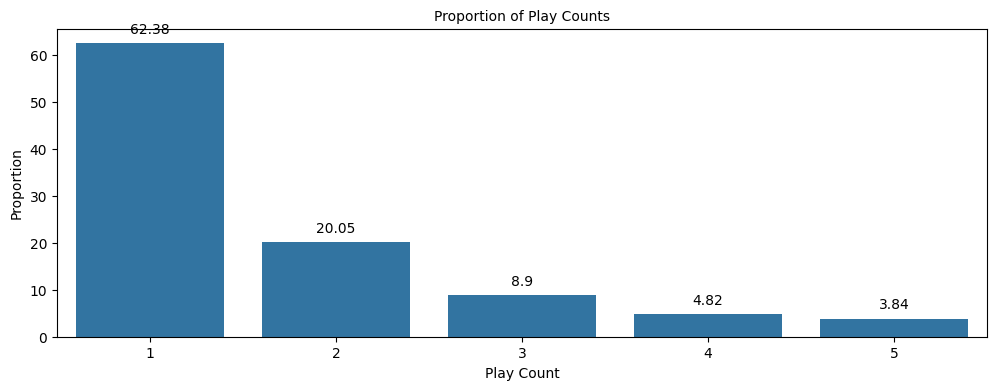

In [41]:
#look at the above but as a proportion of 1 (understand what %)
# Calculate the proportions of play counts
play_count_proportions = (df_final['play_count'].value_counts(normalize=True) * 100).round(2)

# Create the bar chart
plt.figure(figsize=(12, 4))
ax = sns.barplot(x=play_count_proportions.index, y=play_count_proportions.values)

# Add text labels above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)


plt.tick_params(labelsize=10)
plt.title("Proportion of Play Counts", fontsize=10)
plt.xlabel("Play Count", fontsize=10)
plt.ylabel("Proportion", fontsize=10)
plt.show()

**Observation:**

The majority of interactions have a play count of 1. About 60%. Leaving 40% with play count of 2 or more.

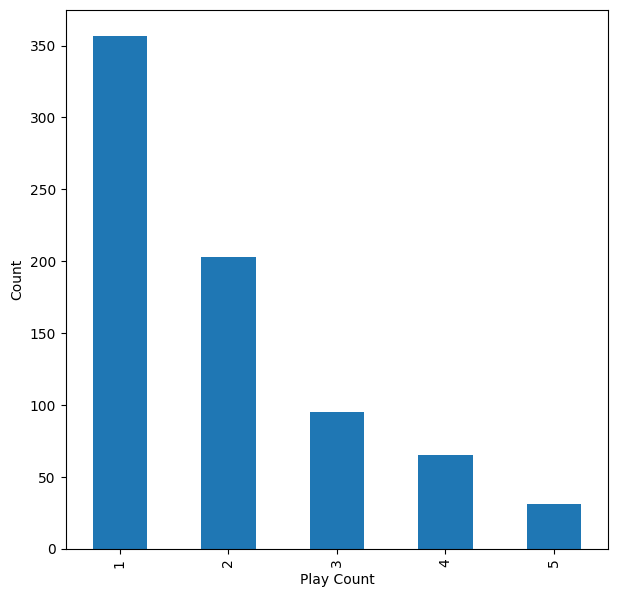

In [42]:
# Plotting distributions of play count for the most interacted song

plt.figure(figsize=(7,7))

df_final[df_final['song_id'] == 8582]['play_count'].value_counts().plot(kind='bar')

plt.xlabel('Play Count')

plt.ylabel('Count')
plt.show()


**Observations:**

- The song with the most interactions (Use Somebody) has about 350 interactions where the user listened to the song 1 time and about 400 interactions where the user listened to the song 2 or more times.


In [43]:
# Finding user-song interactions distribution
count_interactions = df_final.groupby('user_id').count()['song_id'].sort_values(ascending=True)
count_interactions

user_id
76347      1
5710       1
10412      1
12811      1
14439      1
        ... 
9570     150
10763    150
37049    174
15733    183
61472    207
Name: song_id, Length: 3154, dtype: int64

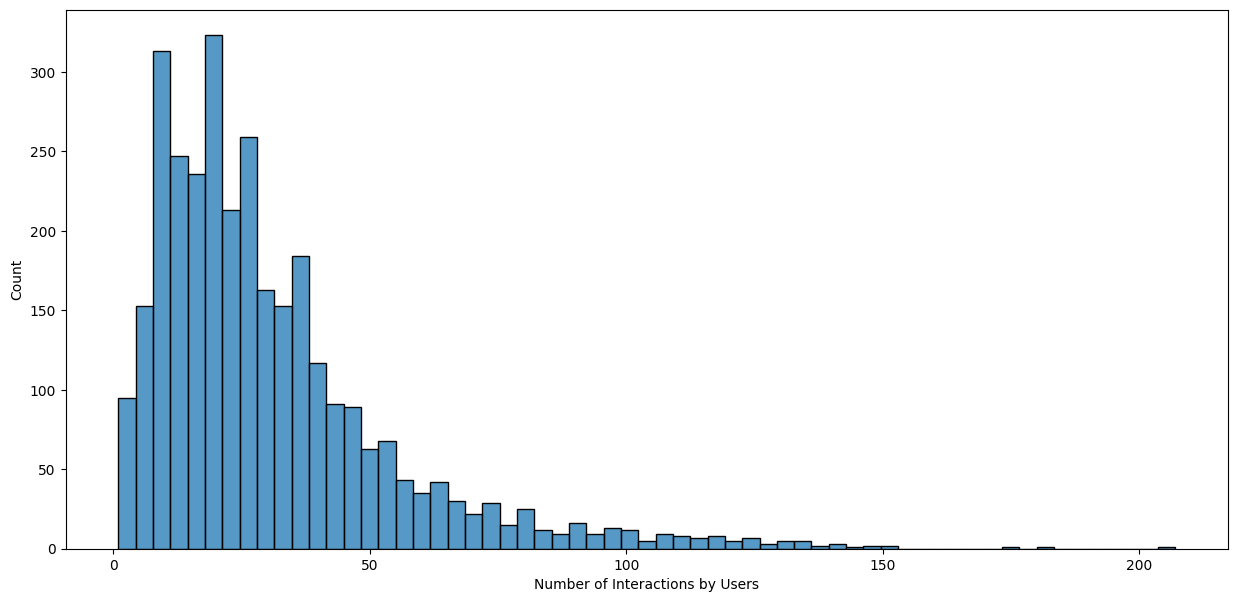

In [44]:
# Plotting user-item interactions distribution

plt.figure(figsize=(15,7))

sns.histplot(count_interactions)

plt.xlabel('Number of Interactions by Users')

plt.show()

**Observations:**

- After filtering our dataset to include users that have listened to 90 or more songs plus songs listened to by 120 or more users and then removing those with play counts greater than 5, we now have the above chart as the distribution of user-item interactions.
- The user-item interactions distribution is skewed to the right.
- No user in our dataset has listened to more than 210 songs.
- The majority users have listened to fewer than 50 songs.


Now that we have explored the data, let's apply different algorithms to build recommendation systems.


## Building various models

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [45]:
# Calculating average play_count
# average_count = df_final.groupby('song_id').mean()['play_count']
average_count = df_final.groupby('song_id')['play_count'].mean()

# Calculating the frequency a song is played
play_freq = df_final.groupby('song_id')['play_count'].sum()

In [46]:
# Making a dataframe with the average_count and play_freq
final_play = pd.DataFrame({'avg_count':average_count, 'play_freq':play_freq})
# Sort the dataframe in descending order, by the average number of counts a song was played.
# Reset the index, so song_id becomes the index.
final_play = final_play.sort_values(by='avg_count', ascending=False)
# Let us see the first five records of the final_play dataset
final_play.head()

,avg_count,play_freq
song_id,,
7224,3.373832,361
8324,2.625000,252
9942,2.486667,373
5531,2.309061,1427
5653,2.296296,248


In [47]:
#general stats of the final_play dataset
final_play.describe(include='all')

,avg_count,play_freq
count,478.000000,478.000000
mean,1.638275,341.083682
std,0.210920,218.353466
min,1.238710,155.000000
25%,1.486484,205.250000
50%,1.613600,248.500000
75%,1.744960,389.750000
max,3.373832,1463.000000


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [48]:
# Build the function to find top n songs based on the highest average play count and the minimum interactions the song has.
# I've chosen the default value for min_interactions to be 100.
# the songs are ranked high to low based on their average play count.

def top_n_songs(data, n, min_interaction=100):

   # Finding songs with minimum number of interactions
    recommendations = data[data['play_freq'] > min_interaction]

    # Sorting values w.r.t. average rating
    recommendations = recommendations.sort_values(by='avg_count', ascending=False)

    return recommendations.index[:n]

In [49]:
# Recommend top 10 songs using the function defined above
# Top 10 songs with at least 100 plays based on average play count
res =list(top_n_songs(final_play, 10, 100))

list_of_songs = []
for i in res:
    # Filter df_final to include rows with the current song_id
    filtered_rows = df_final[df_final['song_id'] == i]

    # Check if any rows were found for the current song_id
    if not filtered_rows.empty:
        # Get the unique song title from the 'title' column
        song_title = filtered_rows['title'].unique()[0]
        list_of_songs.append(song_title)
    else:
        # Handle case where song_id is not found in df_final
        list_of_songs.append('Unknown Title')

print(list_of_songs)


['Victoria (LP Version)', 'The Big Gundown', 'Greece 2000', 'Secrets', 'Transparency', 'Video Killed The Radio Star', 'Luvstruck', "You're The One", 'Heaven Must Be Missing An Angel', 'Mercy:The Laundromat']


In [50]:

final_play.loc[top_n_songs(final_play, 10)]


,avg_count,play_freq
song_id,,
7224,3.373832,361
8324,2.625000,252
9942,2.486667,373
5531,2.309061,1427
5653,2.296296,248
8483,2.235772,275
657,2.218543,335
614,2.217158,827
4831,2.206186,214


The popularity based recommendation system is good at recommending popular songs. This is useful for solving the cold-start problem for new users that have no historical data (or no data at all). Using the popularity based recommendation for new users will serve the user with popular songs to begin exploring. Once more data is generated from the user engaging on the music platform, other models may be more beneficial, such as collaborative filtering, matrix factorization, content based or a hybrid solution. This will increase the likelihood that the songs recommended align with the users preferences and create a more personalized experience.

### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [51]:
# Install the surprise package using pip. Uncomment and run the below code to do the same

!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163003 sha256=c93f42aacf7c671113c8bfce8f8c41610f1f5ab943f9ab3e5ffe2bc1aebce5f9
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [52]:
# Import necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV, RandomizedSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering


In [53]:
#revisit the general stats of our dataset to help decide on thresholds for defining if a user "likes" a song.
df_final['play_count'].describe()

count    97227.000000
mean         1.676880
std          1.071061
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: play_count, dtype: float64

Because the majority of the play_counts are equal to 1, we will assumed that 1 is a full play of the song. This means the user listened to the entire song and thus liked the song. In this case the user did not listen to a portion of the song and skip to the next song. Our default threshold for for our function below will be 1. We will also look at a threshold of 1.5 - user listened to the song more than 1 time- for comparison.

The threshold is used to classify whether a song is relevant or not based on the predicted value. If the predicted value meets the threshold criteria, the song is relevant.

### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE, and F1_Score@k to evaluate the model performance.

In [55]:
# The function to calulate the RMSE, precision@k, recall@k, and F_1 score
def precision_recall_at_k(model, k = 30, threshold = 1):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    # Making predictions on the test data
    predictions=model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x : x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[ : k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[ : k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Mean of all the predicted precisions are calculated
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    accuracy.rmse(predictions)

    # Command to print the overall precision
    print('Precision: ', precision)

    # Command to print the overall recall
    print('Recall: ', recall)

    # Formula to compute the F-1 score
    print('F_1 score: ', round((2 * precision * recall) / (precision + recall), 3))



To evaluate the performance of models, we will be using the above function for precision and recall at k. K is the number of top recommendations to consider and the threshold is the criteria for deciding if a song is relevant. I have chosen the default value of k=30 and threshold = 1, but we will compare other values.

An item is considered **relevant** if its true rating (play count) is greater than a given threshold. An item is considered **recommended** if its estimated rating is greater than the threshold, and if it is among the k highest estimated ratings.


**Recall** - It is the **fraction of actually relevant items that are recommended to the user**  Higher the value of recall, the better the model. High recall indicates that the system is able to capture most of the songs that the user would like, ensuring that users are exposed to a wide variety of relevant songs. This is important if you want to ensure that users are not missing out on potentially enjoyable songs.

**Precision** - It is the **fraction of recommended items that are relevant actually** The higher the value of precision better is the model. High precision indicates that the system is good at recommending songs that the user likes, minimizing the chance of recommending irrelevant songs. This is important if you want to ensure that users are satisfied with the recommendations they receive and are more likely to engage with the recommended songs.

**F1 Score** - It is the **harmonic mean of Precision@k and Recall@k**. When **precision@k and recall@k both seem to be important** then it is useful to use this metric because it is representative of both of them.

We will want to consider the F1 Score since we want to optimize both the percent of relevant songs that are recommended and the percentage and recommended songs that are relevant. Our goal is to create a recommendation system that keeps users engaging on our platform long term. To do this we will balance both recall, exposing users to a wide variety of relevant songs and precision, optimizing user satisfaction with the recommendations they receive.


In [56]:
# Instantiating Reader scale with expected rating scale
 #use rating scale (0, 5)
reader = Reader(rating_scale=(0,5))

# Loading the dataset
 # Take only "user_id","song_id", and "play_count"
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader)

# Splitting the data into train and test dataset
 # Take test_size = 0.2, random_state = 42
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

The test size refers to the proportion of the data that is set aside for testing (evaluation) while training the model on the remaining data.Decreasing the test size increases the size of the training data. This can lead to better model training as the model has more data to learn from, potentially improving its predictive performance. I've chosen to use an 80/20 training/test split.




### User-User Similarity (Collaborative filtering)

In [57]:
# Build the default user-user-similarity model

# KNN algorithm is used to find desired similararities
sim_options = {'name': 'cosine',
               'user_based': True}

algo_knn_user = KNNBasic(sim_options=sim_options,verbose=False, random_state =1)


# Train the algorithm on the trainset, and predict play_count for the testset
algo_knn_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score
precision_recall_at_k(algo_knn_user, 10, 1)
precision_recall_at_k(algo_knn_user, 20, 1)
precision_recall_at_k(algo_knn_user, 30, 1)
precision_recall_at_k(algo_knn_user, 40, 1)
precision_recall_at_k(algo_knn_user, 10, 1.5)
precision_recall_at_k(algo_knn_user, 20, 1.5)
precision_recall_at_k(algo_knn_user, 30, 1.5)
precision_recall_at_k(algo_knn_user, 40, 1.5)

RMSE: 1.0878
Precision:  1.0
Recall:  0.948
F_1 score:  0.973
RMSE: 1.0878
Precision:  1.0
Recall:  0.994
F_1 score:  0.997
RMSE: 1.0878
Precision:  1.0
Recall:  0.999
F_1 score:  0.999
RMSE: 1.0878
Precision:  1.0
Recall:  1.0
F_1 score:  1.0
RMSE: 1.0878
Precision:  0.367
Recall:  0.547
F_1 score:  0.439
RMSE: 1.0878
Precision:  0.366
Recall:  0.565
F_1 score:  0.444
RMSE: 1.0878
Precision:  0.366
Recall:  0.567
F_1 score:  0.445
RMSE: 1.0878
Precision:  0.366
Recall:  0.567
F_1 score:  0.445


In [58]:
#create table with metric values for easy comparison

# Provided metrics
metrics_data = {
    'K Value': [10, 20, 30, 40, 10, 20 ,30 ,40],
    'Threshold': [1, 1, 1, 1, 1.5, 1.5, 1.5, 1.5],
    'RMSE': [1.0878, 1.0878, 1.0878, 1.0878, 1.0878, 1.0878,1.0878,1.0878],
    'Precision': [1.0, 1.0, 1.0, 1.0,0.367, 0.366,0.366,0.366],
    'Recall': [0.948, 0.994, 0.999, 1.0, 0.547, 0.565 ,0.567,0.567],
    'F1 Score': [0.973, 0.997, 0.999, 1.0, 0.439 ,0.444, 0.445, 0.445]
}

# Create DataFrame
results_df = pd.DataFrame(metrics_data)

print(results_df)

   K Value  Threshold    RMSE  Precision  Recall  F1 Score
0       10        1.0  1.0878      1.000   0.948     0.973
1       20        1.0  1.0878      1.000   0.994     0.997
2       30        1.0  1.0878      1.000   0.999     0.999
3       40        1.0  1.0878      1.000   1.000     1.000
4       10        1.5  1.0878      0.367   0.547     0.439
5       20        1.5  1.0878      0.366   0.565     0.444
6       30        1.5  1.0878      0.366   0.567     0.445
7       40        1.5  1.0878      0.366   0.567     0.445


**Observations and Insights:**

Because our datset is sparse and many items have mostly 1 play_count, setting the threshold to 1 may not be suitable for evaluating precision. It may inflate precision values, especially if users have only a few interactions overall. This is likely happening here.

- The baseline user-user similarity model is performing extremely well on the test set when the threshold is set at 1. Here we are assuming the user has played the song all the way through and thus likes the song. We can see from the above table that when threshold = 1 and k = 40 we have a precision, recall and F1 Score or 1. The model is 100% accruate.

- When the threshold is set to 1.5, the criteria for a user liking a song is much more strict - the user has to have listened to the song more than 1 time. With this threshold our baseline user-user similarity model with k-30 has a precision of 0.366, a recall of 0.567  and an F1 Score of 0.445.
  -  The model is doing better at Recall -  ensuring that users are exposed to a wide variety of relevant songs - than Precision - ensuring that users are satisfied with the recommendations. We want to balance both.
  -  We can try to improve the performance by using GridSearchCV to tune different hyperparameters of the algorithm.


In [59]:
# Predicting play_count for a sample user with a listened song
# Use any user id  and song_id
algo_knn_user.predict(6958, 1671	, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.73   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.7272465421796874, details={'actual_k': 40, 'was_impossible': False})

In [60]:
# Predicting play_count for a sample user with a song not-listened by the user
 #predict play_count for any sample user
algo_knn_user.predict(6958, 9081, verbose=True)


user: 6958       item: 9081       r_ui = None   est = 1.68   {'actual_k': 38, 'was_impossible': False}


Prediction(uid=6958, iid=9081, r_ui=None, est=1.684258913839607, details={'actual_k': 38, 'was_impossible': False})

**Observations and Insights:**

User 6958 listened to song 1671 two times. Our model predicted the play count for this song to be 1.73. The predicted value is very close to the actual play count. The model is performing well on this prediction.

The model also predicts that user 6958 will like song 9081, a song the user has not listened to.



Now, let's try to tune the model and see if we can improve the model performance.

In [67]:
# Setting up parameter grid to tune the hyperparameters

param_grid = {'k': [10, 20, 30, 40, 50, 60], 'min_k': [9, 12, 15, 18, 21],
              'sim_options': {'name': ['msd', 'cosine', 'pearson', 'pearson_baseline'],
                              'user_based': [True]}
              }


# Performing 3-fold cross-validation to tune the hyperparameters
# using RandomizedSearchVS instead of GridSearchCV for computational benefits
gs = RandomizedSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# Fitting the data
 # Use entire data for GridSearch
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])





1.0323112816691369
{'k': 40, 'min_k': 18, 'sim_options': {'name': 'pearson_baseline', 'user_based': True}}


In [69]:
# Train the best model found in above randomizedsearch

# Using the optimal similarity measure for user-user-based collaborative filtering
sim_options = {'name': 'pearson_baseline',
               'user_based': True}

# Creating an instance of KNNBasic with optimal hyperparameter values
similarity_algo_optimized = KNNBasic(sim_options = sim_options, k = 40, min_k = 18, random_state = 1, verbose = False)


# Training the algorithm on the train set

similarity_algo_optimized.fit(trainset)
precision_recall_at_k(similarity_algo_optimized, 40, 1)
precision_recall_at_k(similarity_algo_optimized, 40, 1.5)

RMSE: 1.0367
Precision:  1.0
Recall:  1.0
F_1 score:  1.0
RMSE: 1.0367
Precision:  0.401
Recall:  0.613
F_1 score:  0.485


**Observations and Insights:**

- Through tuning the hyperparamters of the baseline user-user similarity model, we are able to improve the performance of the model.
- Using the threshold of 1, the RMSE decreased from 1.0878 to 1.0367.
- With the threshold of 1.5, we see the F1 Score improve from 0.445 to 0.485. Recall improves from 0.567 to 0.613, and precision improves from 0.366 to 0.401.

In [70]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
similarity_algo_optimized.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.91   {'actual_k': 34, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.913823085300004, details={'actual_k': 34, 'was_impossible': False})

In [71]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)
similarity_algo_optimized.predict(6958, 771,verbose=True)

user: 6958       item: 771        r_ui = None   est = 1.34   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=771, r_ui=None, est=1.3400537659673868, details={'actual_k': 40, 'was_impossible': False})

The optimized user-user similarity model predicted that user 6958 would lke song 1671. The predicted value of 1.91 is very close to the actual value of 1.  

The optimized model also predicted a value of 1.34 for song 771 for this user.


Get the 5 nearest neighbors (most similar) for a user to a certain song?

In [72]:
# Use inner id 0
similarity_algo_optimized.get_neighbors(0, k=5)

[1273, 508, 1518, 338, 160]

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [73]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended product ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot(index='user_id', columns='song_id', values='play_count')

    # Extracting those song ids which the user_id has not heard yet
    non_interacted_items = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the song ids which user_id has not interacted yet
    for song_id in non_interacted_items:

        # Predicting the ratings for those non listened song ids by this user
        est = algo.predict(user_id, song_id).est

        # Appending the predicted ratings
        recommendations.append((song_id, est))
    # Sorting the predicted ratings in descending order
    recommendations.sort(key=lambda x: x[1], reverse=True)

    return recommendations[:top_n] # Returing top n highest predicted rating songs for this user

In [74]:
# Make top 5 recommendations for any user_id with a similarity-based recommendation engine
recommendations = get_recommendations(df_final, 47786, 5, similarity_algo_optimized)

In [75]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_ratings"
pd.DataFrame(recommendations, columns=['song_id', 'predicted_ratings'])

,song_id,predicted_ratings
0,7224,3.097323
1,8483,2.832571
2,5653,2.650648
3,1765,2.428922
4,703,2.391083


**Observations**:
We made 5 recommendations for user 47786. The predicted play counts of the recommended songs range fom 2.4 to 3.1.

### Correcting the play_counts and Ranking the above songs

In [76]:
def ranking_songs(recommendations, final_rating):
  # Sort the songs based on play counts
  ranked_songs = final_rating.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending = False)[['play_freq']].reset_index()

  # Merge with the recommended songs to get predicted play_count
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id','predicted_ratings']), on = 'song_id', how = 'inner')

  # Rank the songs based on corrected play_counts
  ranked_songs['corrected_ratings'] = ranked_songs['predicted_ratings'] - 1 / np.sqrt(ranked_songs['play_freq'])

  # Sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_ratings', ascending=False)
  return ranked_songs

**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

Adding the correction would increase the song's chance of being recommended. Since we have a a max value of play_count = 5 we subtract the correction to avoid the play_count having a value higher than 5 and getting a more realistic predictions.

In [77]:
# Applying the ranking_songs function on the final_play data
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
1,7224,361,3.097323,3.044692
2,8483,275,2.832571,2.772268
3,5653,248,2.650648,2.587148
4,1765,219,2.428922,2.361348
0,703,1042,2.391083,2.360104


### Item Item Similarity-based collaborative filtering recommendation systems

In [78]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance
# Defining similarity measure
sim_options = {'name': 'cosine',
               'user_based': False}
# Defining nearest neighbour algorithm
algo_knn_item = KNNBasic(sim_options=sim_options,verbose=False)
# Train the algorithm on the train set
algo_knn_item.fit(trainset)
# Let us compute precision@k, recall@k, and f_1 score
precision_recall_at_k(algo_knn_item, 10, 1)
precision_recall_at_k(algo_knn_item, 20, 1)
precision_recall_at_k(algo_knn_item, 30, 1)
precision_recall_at_k(algo_knn_item, 40, 1)
precision_recall_at_k(algo_knn_item, 10, 1.5)
precision_recall_at_k(algo_knn_item, 20, 1.5)
precision_recall_at_k(algo_knn_item, 30, 1.5)
precision_recall_at_k(algo_knn_item, 40, 1.5)

RMSE: 1.0235
Precision:  1.0
Recall:  0.948
F_1 score:  0.973
RMSE: 1.0235
Precision:  1.0
Recall:  0.994
F_1 score:  0.997
RMSE: 1.0235
Precision:  1.0
Recall:  0.999
F_1 score:  0.999
RMSE: 1.0235
Precision:  1.0
Recall:  1.0
F_1 score:  1.0
RMSE: 1.0235
Precision:  0.29
Recall:  0.475
F_1 score:  0.36
RMSE: 1.0235
Precision:  0.289
Recall:  0.497
F_1 score:  0.365
RMSE: 1.0235
Precision:  0.289
Recall:  0.5
F_1 score:  0.366
RMSE: 1.0235
Precision:  0.289
Recall:  0.5
F_1 score:  0.366


In [79]:
#create table of performance metrics from above for easy comparison
# Initialize lists to store results
k_values = [10, 20, 30, 40, 10, 20, 30, 40]
threshold_values = [1, 1, 1, 1, 1.5, 1.5, 1.5, 1.5]
rmse_values = [1.0235, 1.0235, 1.0235, 1.0235, 1.0235, 1.0235, 1.0235, 1.0235]
precision_values = [1.0, 1.0, 1.0, 1.0, 0.29, 0.289, 0.289, 0.289]
recall_values = [0.948, 0.994, 0.999, 1.0, 0.475, 0.497, 0.5, 0.5]
f1_values = [0.973, 0.997, 0.999, 1.0, 0.36, 0.365, 0.366, 0.366]

# Create DataFrame
results_df_item = pd.DataFrame({
    'K Value': k_values,
    'Threshold': threshold_values,
    'RMSE': rmse_values,
    'Precision': precision_values,
    'Recall': recall_values,
    'F1 Score': f1_values
})

print(results_df_item)

   K Value  Threshold    RMSE  Precision  Recall  F1 Score
0       10        1.0  1.0235      1.000   0.948     0.973
1       20        1.0  1.0235      1.000   0.994     0.997
2       30        1.0  1.0235      1.000   0.999     0.999
3       40        1.0  1.0235      1.000   1.000     1.000
4       10        1.5  1.0235      0.290   0.475     0.360
5       20        1.5  1.0235      0.289   0.497     0.365
6       30        1.5  1.0235      0.289   0.500     0.366
7       40        1.5  1.0235      0.289   0.500     0.366


**Observations and Insights:**

The baseline item-item similarity model is performing about the same as our baseline user-user similarity model and worse than our tuned similarity model.

- The baseline item-item similarity model is performing extremely well on the test set when the threshold is set at 1. We can see from the above table that when threshold = 1 and k = 40 we have a precision, recall and F1 Score or 1. The model is 100% accruate.  (this is the same performance as baseline user-user similarity).

- When the threshold is set to 1.5, our baseline item-item similarity model with k-30 has a precision of 0.289, a recall of 0.50  and an F1 Score of 0.366. This is not as performant as the baseline user-user similarity model with threshold of 1.5

In [80]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) heard by the user
algo_knn_item.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.31   {'actual_k': 27, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3085235550954317, details={'actual_k': 27, 'was_impossible': False})

In [81]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)
algo_knn_item.predict(47786, 1671,  verbose=True)

user: 47786      item: 1671       r_ui = None   est = 1.86   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=47786, iid=1671, r_ui=None, est=1.8635630302053563, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights:**

The baseline item-item similarity model predicted a value of 1.31 for user 6958 on song 1671. The real value is 2. The model is not doing well on this user-item pair.

The model predicts a 1.86 rating value for user 47786 on song 1671.

In [84]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30, 40, 50, 60],
              'min_k': [9, 12, 15, 18, 21],
              'sim_options': {'name': ['msd', 'cosine', 'pearson', 'pearson_baseline'],
                              'user_based': [False]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = RandomizedSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data

gs.fit(data)
# Find the best RMSE score
print(gs.best_score['rmse'])

# Extract the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


1.0193012835782058
{'k': 60, 'min_k': 9, 'sim_options': {'name': 'pearson_baseline', 'user_based': False}}


In [85]:
# Apply the best model found in the grid search
# KNNBasic with optimal hyperparameter values
similarity_algo_optimized_item = KNNBasic(sim_options={'name': 'pearson_baseline', 'user_based': False}, k=60, min_k=9, verbose=False)
# Training the algorithm on the train set
similarity_algo_optimized_item.fit(trainset)

#performance of optimized model with threshold = 1
precision_recall_at_k(similarity_algo_optimized_item, 60, 1)

#performance of optimized model with threshold = 1.5
precision_recall_at_k(similarity_algo_optimized_item, 60, 1.5)


RMSE: 1.0147
Precision:  1.0
Recall:  1.0
F_1 score:  1.0
RMSE: 1.0147
Precision:  0.391
Recall:  0.607
F_1 score:  0.476


**Observations and Insights:**

Tuning the hyperparameters of the baseline item-item similarity model improved the performance of the model.

- When the threshold is set to 1 we observe that the RMSE decreased from  1.0235 to 1.0147.

- When the threshold is set to 1.5 we observe that the F1 score improved from 0.366 to 0.476, recall improved from 0.5 to 0.607 and precision improved from 0.289 to 0.391


- Overall we were able to optimize the baseline item - item similarity model through hyperparameter tuning. However, our optimized user - user similarity model remains our best model yet.

In [86]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
similarity_algo_optimized_item.predict(6958, 1671, r_ui=2, verbose=True)


user: 6958       item: 1671       r_ui = 2.00   est = 1.98   {'actual_k': 11, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.977394973225492, details={'actual_k': 11, 'was_impossible': False})

In [87]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not heard by the user

similarity_algo_optimized_item.predict(6958, 3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.66   {'actual_k': 12, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.6619354353380729, details={'actual_k': 12, 'was_impossible': False})

**Observations and Insights:**

The optimized item-item similarity model was able to more accurately predict the rating for user 6958 on song 1671. The baseline model predicted a 1.31 rating while the optimized model is predicting a 1.98 rating. The actual value is 2.

This model predicts a rating valye of 1.66 for user 6958 on item 3232.

In [88]:
# Find five most similar items to the item with inner id 0
similarity_algo_optimized_item.get_neighbors(0, k=5)


[152, 74, 43, 121, 144]

In [89]:
# Making top 5 recommendations for any user_id  with item_item_similarity-based recommendation engine
recommendations = get_recommendations(df_final, 27018, 5, similarity_algo_optimized_item)

In [90]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns=['song_id', 'predicted_ratings'])

,song_id,predicted_ratings
0,1571,3.716416
1,5049,3.572543
2,8735,3.561028
3,6482,3.525728
4,5287,3.483451


In [91]:
# Applying the ranking_songs function
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
3,1571,166,3.716416,3.638801
2,5049,202,3.572543,3.502184
0,8735,265,3.561028,3.499599
4,6482,164,3.525728,3.447641
1,5287,254,3.483451,3.420706


### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [92]:
# Build baseline model using svd
# Using SVD matrix factorization
svd = SVD(random_state=1)

# Training the algorithm on the train set
svd.fit(trainset)

# Compute precision@k and recall@k
precision_recall_at_k(svd, 10, 1)
precision_recall_at_k(svd, 20, 1)
precision_recall_at_k(svd, 30, 1)
precision_recall_at_k(svd, 40, 1)

precision_recall_at_k(svd, 10, 1.5)
precision_recall_at_k(svd, 20, 1.5)
precision_recall_at_k(svd, 30, 1.5)
precision_recall_at_k(svd, 40, 1.5)

RMSE: 1.0095
Precision:  0.999
Recall:  0.927
F_1 score:  0.962
RMSE: 1.0095
Precision:  0.999
Recall:  0.969
F_1 score:  0.984
RMSE: 1.0095
Precision:  0.999
Recall:  0.974
F_1 score:  0.986
RMSE: 1.0095
Precision:  0.999
Recall:  0.974
F_1 score:  0.986
RMSE: 1.0095
Precision:  0.382
Recall:  0.534
F_1 score:  0.445
RMSE: 1.0095
Precision:  0.38
Recall:  0.55
F_1 score:  0.449
RMSE: 1.0095
Precision:  0.38
Recall:  0.552
F_1 score:  0.45
RMSE: 1.0095
Precision:  0.38
Recall:  0.553
F_1 score:  0.45


In [94]:
#create table of above performance metrics for easy comparison
result_svd = {
    'K Value': [10, 20, 30, 40, 10, 20, 30, 40],
    'Threshold': [1, 1, 1, 1, 1.5, 1.5, 1.5, 1.5],
    'RMSE': [1.0095, 1.0095, 1.0095, 1.0095, 1.0095, 1.0095, 1.0095, 1.0095],
    'Precision': [0.999, 0.999, 0.999, 0.999, 0.382, 0.38, 0.38, 0.38],
    'Recall': [0.927, 0.969, 0.974, 0.974, 0.534, 0.55, 0.552, 0.553],
    'F1 Score': [0.962, 0.984, 0.986, 0.986, 0.445, 0.449, 0.45, 0.45]
}

# Create the DataFrame
results_df_svd = pd.DataFrame(result_svd)

# Print the DataFrame
print(results_df_svd)

   K Value  Threshold    RMSE  Precision  Recall  F1 Score
0       10        1.0  1.0095      0.999   0.927     0.962
1       20        1.0  1.0095      0.999   0.969     0.984
2       30        1.0  1.0095      0.999   0.974     0.986
3       40        1.0  1.0095      0.999   0.974     0.986
4       10        1.5  1.0095      0.382   0.534     0.445
5       20        1.5  1.0095      0.380   0.550     0.449
6       30        1.5  1.0095      0.380   0.552     0.450
7       40        1.5  1.0095      0.380   0.553     0.450


Our baseline SVD model performs extremely well when the threshold is set to 1. We observe when k = 30 the F1 Score si 0.986, recall is 0.974 and precision is 0.999.

When the threshold is stricter at 1.5, we observe an F1 score of 0.45 at k=30. Recall is 0.552 and precisions is 0.380. This baseline model at this threhold is preforming better than our other baseline models but not as well as the optimized models. Let's try tuning the hyperparameters and comparing.

In [95]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
svd.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.31   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.309427730909606, details={'was_impossible': False})

In [96]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
svd.predict(47786, 3232, verbose=True)


user: 47786      item: 3232       r_ui = None   est = 2.00   {'was_impossible': False}


Prediction(uid=47786, iid=3232, r_ui=None, est=2.003606241123921, details={'was_impossible': False})

The baseline SVD model has predicted a 1.31 rating value for user 6958 on song 1671. The actual value is 2. The model is not performing well on this user-item pair.

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [98]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10,20, 30, 40, 50, 60], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6,0.8]}

# Perform 3-fold grid-search cross-validation
gs_svd = RandomizedSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# Fitting data
gs_svd.fit(data)

# Best RMSE score
print(gs_svd.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs_svd.best_params['rmse'])

0.9931148774778066
{'n_epochs': 50, 'lr_all': 0.01, 'reg_all': 0.2}


In [99]:
# Building the optimized SVD model using optimal hyperparameters
svd_optimized = SVD(n_epochs=50, lr_all=0.01, reg_all=0.2, random_state = 1)

# Training the algorithm on the train set
svd_optimized=svd_optimized.fit(trainset)

# Let us compute precision@k and recall@k

precision_recall_at_k(svd_optimized,40,1)
precision_recall_at_k(svd_optimized,40,1.5)

RMSE: 0.9986
Precision:  0.998
Recall:  0.992
F_1 score:  0.995
RMSE: 0.9986
Precision:  0.364
Recall:  0.552
F_1 score:  0.439


**Observations and Insights**

- Tuning the hyperpameters of the Matrix Factorization baseline model did not make a notable difference to the model.
- The RMSE of the optimized Matrix Factorization model is 0.9986.
- The precision of the optimized model at threshold 1 is 0.998 and at threshold 1.5 is is 0.364.
- The recall of the optimized model at threshold 1 is 0.992 and at threshold 1.5 is  is 0.552.
- The F1 Score of the optimized Matrix Factorization model at threshold 1 is 0.995 and at threshold 1.5 is 0.439.

- Overall this did not prove to be our best model.

In [100]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
svd_optimized.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.26   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.257535556213573, details={'was_impossible': False})

In [101]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
svd_optimized.predict(6958, 3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.24   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.2412830276284155, details={'was_impossible': False})

**Observations and Insights:**

Both the baseline and optimized SVD models predicted a rating of 1.26 for user 6958 on songg 1671. The actual value is 2. The model is not performing well on this user-item pair.


In [102]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
svd_recommendations = get_recommendations(df_final, 6958, 5, svd_optimized)

In [103]:
# Ranking songs based on above recommendations
ranking_songs(svd_recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
1,7224,361,2.529610,2.476978
3,6084,206,2.274747,2.205074
2,8483,275,2.091727,2.031424
4,2914,194,2.080186,2.008390
0,9942,373,1.941319,1.889541


**Observations and Insights:**

So far, our best model is the optimized user-user similarity model.

### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [104]:
# Make baseline clustering model
# Using CoClustering algorithm
clust_baseline = CoClustering(random_state = 1)

# Training the algorithm on the train set
clust_baseline.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score
precision_recall_at_k(clust_baseline, 10, 1)
precision_recall_at_k(clust_baseline, 20, 1)
precision_recall_at_k(clust_baseline, 30, 1)
precision_recall_at_k(clust_baseline, 40, 1)

precision_recall_at_k(clust_baseline, 10, 1.5)
precision_recall_at_k(clust_baseline, 20, 1.5)
precision_recall_at_k(clust_baseline, 30, 1.5)
precision_recall_at_k(clust_baseline, 40, 1.5)


RMSE: 1.0363
Precision:  0.979
Recall:  0.863
F_1 score:  0.917
RMSE: 1.0363
Precision:  0.979
Recall:  0.903
F_1 score:  0.939
RMSE: 1.0363
Precision:  0.979
Recall:  0.907
F_1 score:  0.942
RMSE: 1.0363
Precision:  0.979
Recall:  0.908
F_1 score:  0.942
RMSE: 1.0363
Precision:  0.349
Recall:  0.483
F_1 score:  0.405
RMSE: 1.0363
Precision:  0.348
Recall:  0.5
F_1 score:  0.41
RMSE: 1.0363
Precision:  0.347
Recall:  0.503
F_1 score:  0.411
RMSE: 1.0363
Precision:  0.347
Recall:  0.503
F_1 score:  0.411


In [105]:
#putting the output into a table for easy comparison
# Define the data
result = {
    'K Value': [10, 20, 30, 40, 10, 20, 30, 40],
    'Threshold': [1, 1, 1, 1, 1.5, 1.5, 1.5, 1.5],
    'RMSE': [1.0363, 1.0363, 1.0363, 1.0363, 1.0363, 1.0363, 1.0363, 1.0363],
    'Precision': [0.979, 0.979, 0.979, 0.979, 0.349, 0.348, 0.347, 0.347],
    'Recall': [0.863, 0.903, 0.907, 0.908, 0.483, 0.5, 0.503, 0.503],
    'F1 Score': [0.917, 0.939, 0.942, 0.942, 0.405, 0.41, 0.411, 0.411]
}

# Create the DataFrame
results_df_clust = pd.DataFrame(result)

# Print the DataFrame
print(results_df_clust)

   K Value  Threshold    RMSE  Precision  Recall  F1 Score
0       10        1.0  1.0363      0.979   0.863     0.917
1       20        1.0  1.0363      0.979   0.903     0.939
2       30        1.0  1.0363      0.979   0.907     0.942
3       40        1.0  1.0363      0.979   0.908     0.942
4       10        1.5  1.0363      0.349   0.483     0.405
5       20        1.5  1.0363      0.348   0.500     0.410
6       30        1.5  1.0363      0.347   0.503     0.411
7       40        1.5  1.0363      0.347   0.503     0.411


The CoCluster baseline model has performed the worst when the threshold is 1. Other models were able the achieve an F1 Score of 1. This model's best F1 score is 0.942 at k=40.

The model is also not as performant as other models we have evaluated when the threshold is set to 1.5.

In [59]:
# Making prediction for user_id 6958 and song_id 1671
clust_baseline.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.20   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.1991666963987566, details={'was_impossible': False})

In [60]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not heard by the user
clust_baseline.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.02   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.0190391161058479, details={'was_impossible': False})

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [61]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [4, 5, 6, 7,8,9], 'n_cltr_i': [4 ,5, 6, 7,8,9], 'n_epochs': [10, 20, 30,40,50]}


# Performing 3-fold grid search cross-validation
gs = RandomizedSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.048298600363539
{'n_cltr_u': 5, 'n_cltr_i': 4, 'n_epochs': 40}


In [62]:
# Train the tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u = 5, n_cltr_i = 4, n_epochs = 40, random_state = 1)

# Training the algorithm on the train set
clust_tuned.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10

precision_recall_at_k(clust_tuned, 40, 1)
precision_recall_at_k(clust_tuned, 40, 1.5)



RMSE: 1.0490
Precision:  0.98
Recall:  0.909
F_1 score:  0.943
RMSE: 1.0490
Precision:  0.347
Recall:  0.492
F_1 score:  0.407


**Observations and Insights:**

- Tuning the hyperparenting of the baseline cluster based model, did not make a noteable improvement.

In [63]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
clust_tuned.predict(6958, 1671, r_ui = 2, verbose = True)


user: 6958       item: 1671       r_ui = 2.00   est = 1.41   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.4096317200089938, details={'was_impossible': False})

In [64]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
clust_tuned.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.11   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.1058455308784416, details={'was_impossible': False})

**Observations and Insights:**

The tuned cluster based model predicted a rating value pf 1.41 for user 6958 on song 1671. The actual value is 2. The model did not perform well on this user-item pair.

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [68]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
clustering_recommendations = get_recommendations(df_final, 6958, 5, clust_tuned)


### Correcting the play_count and Ranking the above songs

In [69]:
# Ranking songs based on the above recommendations
ranking_songs(clustering_recommendations, final_play)


,song_id,play_freq,predicted_ratings,corrected_ratings
2,7224,361,2.692641,2.640009
0,4448,1291,2.170560,2.142729
1,8092,1126,2.132015,2.102214
4,8831,210,2.105997,2.036990
3,8324,252,2.075864,2.012870


**Observations and Insights:**

The cluster based model provided 5 recommendations for user 6958 that range from predicted ratings of 2 to 2.6. This is not as successful as other models on this user.

Our best model thus far, at threshold = 1 is the tuned (optimized) item-item similarity model.

### Content Based Recommendation Systems

In [70]:
#creating a copy of df_final to use moving forward.
df_small = df_final

In [71]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_small['text'] = df_small['title'] +' - '+ df_small['release']+ ' - ' + df_small['artist_name']
df_small.head()

,user_id,song_id,play_count,title,release,artist_name,year,text
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000,Daisy And Prudence - Distillation - Erin McKeown
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004,The Ballad of Michael Valentine - Sawdust - Th...
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007,I Stand Corrected (Album) - Vampire Weekend - ...
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007,They Might Follow You - Tiny Vipers - Tiny Vipers
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007,Monkey Man - You Know I'm No Good - Amy Winehouse


In [72]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_small = df_small[['user_id', 'song_id', 'play_count', 'title', 'text']]

# Drop the duplicates from the title column
df_small= df_small.drop_duplicates(subset = ['title'])

# Set the title column as the index
df_small = df_small.set_index('title')

# See the first 5 records of the df_small dataset
df_small.head()


,user_id,song_id,play_count,text
title,,,,
Daisy And Prudence,6958,447,1,Daisy And Prudence - Distillation - Erin McKeown
The Ballad of Michael Valentine,6958,512,1,The Ballad of Michael Valentine - Sawdust - Th...
I Stand Corrected (Album),6958,549,1,I Stand Corrected (Album) - Vampire Weekend - ...
They Might Follow You,6958,703,1,They Might Follow You - Tiny Vipers - Tiny Vipers
Monkey Man,6958,719,1,Monkey Man - You Know I'm No Good - Amy Winehouse


In [73]:
#return the count of rows and columns
df_small.shape

(476, 4)

In [74]:
# Create the series of indices from the data
indices = pd.Series(df_small.index)

indices[ : 5]


0                 Daisy And Prudence
1    The Ballad of Michael Valentine
2          I Stand Corrected (Album)
3              They Might Follow You
4                         Monkey Man
Name: title, dtype: object

In [75]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library
nltk.download("punkt")

# Download stopwords library
nltk.download("stopwords")

# Download wordnet
nltk.download("wordnet")

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


We will create a **function to pre-process the text data:**

In [76]:
# Create a function to tokenize the text
def tokenize(text):

    text = re.sub(r"[^a-zA-Z]"," ", text.lower())

    tokens = word_tokenize(text)

    words = [word for word in tokens if word not in stopwords.words('english')]  # Use stopwords of english

    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [77]:
# Create tfidf vectorizer
tfidf = TfidfVectorizer(tokenizer = tokenize)

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
song_tfidf = tfidf.fit_transform(df_small['text'].values).toarray()


In [78]:
# Compute the cosine similarity for the tfidf above output
similar_songs = cosine_similarity(song_tfidf, song_tfidf)


 Finally, let's create a function to find most similar songs to recommend for a given song.

In [79]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):

    recommended_songs = []

    # Getting the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1 : 11].index)
    print(top_10_indexes)

    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_small.index)[i])

    return recommended_songs

Recommending 10 songs similar to Learn to Fly

In [80]:
# Make the recommendation for the song with title 'Learn To Fly'
recommendations('Learn To Fly', similar_songs)


[435, 205, 372, 304, 348, 301, 314, 324, 323, 322]


['Everlong',
 'The Pretender',
 'Nothing Better (Album)',
 'From Left To Right',
 'Lifespan Of A Fly',
 "I'm Done",
 'You Give Love A Bad Name',
 'Happy Endings',
 'One More Sad Song',
 'One Of The Boys']

**Observations and Insights:**

'Learn to Fly' is a alternative rock song by the Foo Fighters. Of the 10 songs recommended 2 songs were also Foo Fighter songs,2 Songs were by The All American Rejects which is also an alternative band and 1 was a Postal Service song. All 6 of these songs feel like good similar recommendations to Learn to Fly. However, the other 4 recommendations were pop or electic dance music which was not quite as similar and often felt like odd recommendations. This suggests that the content based model is working pretty well but could be better.


UPDATE THIS

## **Conclusion and Recommendations**


**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:

- Techniques implemented in this project include the following:
  - Rank Based or Popularity Based
  - User-User Similarity Collaborative Filtering
  - Item-Item Similarity Collaborative Filtering
  - Matrix Factorization
  - Cluster Based
  - Content Based
- Based on the performance of baseline models and optimized models, the tuned (optimized) item-item similarity model performed relatively better than the other models with perfect accuracy at threshold = 1.
- The optimized user-user similarity model also performed extremely well.



**2. Refined insights**:

Our dataset exhibits a high level of sparsity, where the majority of users have only interacted with a small fraction of the songs available. Moreover, most interactions involve songs that have been listened to only once. Our threshold for considering a song "liked" is best set at a less strict threshold of 1.

This sparsity issue suggests that our data primarily reflects early user behavior, lacking the extensive historical data that would capture a broader range of songs and more play counts over time. Additionally, our dataset predominantly comprises songs from the 2000-2010 period, lacking more recent releases. Many songs had an imputed value of 0 for release year. The assumption is these songs may have release dates prior to 2000 but the value was missing. The absence of contextual data points such as genre further limits our ability to leverage content-based recommendations effectively or create recommendations based on genre/activity/mood the user is exhibiting. Since genre and release date are publicly available data, it is recommended that these missing data points be collected and applied.

Our dataset's limitations extend to the absence of rating-based data, which would provide explicit insights into whether users liked or disliked a song. This missing element hampers our ability to precisely gauge user preferences and tailor recommendations accordingly.

These challenges underscore the need to explore strategies for improving data richness, incorporating recent songs, and integrating contextual information like genre to enhance the accuracy and relevance of our recommendation systems.